# Tugas Kecerdasan Buatan Week 10

Nama  : Alexandro Christian Wijaya

NIM   : 19/443564/TK/48760

Prodi : Sarjana Teknik Elektro

# Deskripsi tugas

* Carilah sebuah masalah real yang bisa diatasi dengan model DL menggunakan Pytorch (disarankan) atau Tensorflow.
* Tentukan dan analisis model yang digunakan berdasar permasalahan yang diangkat.
* Buatlah video demo dari model yang telah dibuat.

# Permasalahan yang Diangkat

Prediksi harga median perumahan di California dalam 1 block (dalam US Dollars). Dataset diambil dari [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

Dalam dataset, terdapat beberapa kolom:
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

Untuk memprediksi harga rumah berupa numeris, saya akan menggunakan model Linear Regression. Model linear regression berbentuk persamaan linear yaitu

$y = wX + b$

Dengan y adalah target prediksi berupa variable dependent, gradient w (weight), dan bias b (intercept dari sumbu y)

Model yang digunakan akan diprediksi dengan loss function Mean Squared Error (MSE). Alasan penggunaan MSE karena sederhana dan cocok untuk pengaplikasian pada model regresi linear di banyak kasus. Model MSE mengikuti persamaan

$MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2$

dengan $Y_i$ adalah true value dan $\hat{Y_i}$ adalah prediction

# Import Library dan Dataset

In [1]:
import numpy as np
import pandas as pd 
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib
from tqdm import tqdm # progress bar

torch.manual_seed(42)

In [2]:
dataset = pd.read_csv("/content/housing.csv")
print(dataset.head())
print(dataset.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

Terdapat 9 kolom dengan 8 numerical dan 1 categorical. Kemudian terdapat beberapa baris pada total_bedrooms memiliki null values. Untuk memudahkan maka null values akan didrop dan categorical akan didrop.

In [3]:
dataset = dataset.dropna()
dataset = dataset.drop("ocean_proximity", axis=1)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB
None


# Membuat model

Mendapatkan semua kolom dalam tensor

In [4]:
households = torch.tensor( data = dataset.households.values, dtype = torch.float )
housing_median_age = torch.tensor( data = dataset.housing_median_age.values, dtype = torch.float)
latitude = torch.tensor( data = dataset.latitude.values, dtype = torch.float)
longitude = torch.tensor( data = dataset.longitude.values, dtype = torch.float)
median_income = torch.tensor( data = dataset.median_income.values, dtype = torch.float)
population = torch.tensor( data = dataset.population.values, dtype = torch.float)
total_bedrooms = torch.tensor( data = dataset.total_bedrooms.values, dtype = torch.float)
total_rooms = torch.tensor( data = dataset.total_rooms.values, dtype = torch.float)
median_house_value = torch.tensor( data = dataset.median_house_value.values, dtype = torch.float)

Mendefinisikan weight untuk setiap kolom dengan requires grad untuk track gradien

In [5]:
a = torch.randn(1, requires_grad = True)  # start with a random number from a normal distribution
b = torch.randn(1, requires_grad = True)
c = torch.randn(1, requires_grad = True)
d = torch.randn(1, requires_grad = True)
e = torch.randn(1, requires_grad = True)
f = torch.randn(1, requires_grad = True)
g = torch.randn(1, requires_grad = True)
h = torch.randn(1, requires_grad = True)
i = torch.randn(1, requires_grad = True)

def Model(households: torch.Tensor, housing_median_age: torch.Tensor, latitude: torch.Tensor, longitude: torch.Tensor, median_income: torch.Tensor, population: torch.Tensor, total_bedrooms: torch.Tensor, total_rooms: torch.Tensor):
  return a + b*households + c*housing_median_age + d*latitude + e*longitude + f*median_income + g*population + h*total_bedrooms + i*total_rooms

In [6]:
def MSE(y_predicted:torch.Tensor, y_target:torch.Tensor):
    error = y_predicted - y_target
    return torch.sum(error**2 ) / error.numel()

In [7]:
# loss function & optimizer
predicted = Model(households, housing_median_age, latitude, longitude, median_income, population, total_bedrooms, total_rooms)
loss = MSE(y_predicted = predicted, y_target=median_house_value)
print(loss)

tensor(5.4380e+10, grad_fn=<DivBackward0>)


In [8]:
loss.backward()

# Training dan Evaluasi

100%|██████████| 1000/1000 [00:00<00:00, 1119.80it/s]


(Text(0.5, 0, 'Epoch (#)'), Text(0, 0.5, 'Mean squared Errors'))

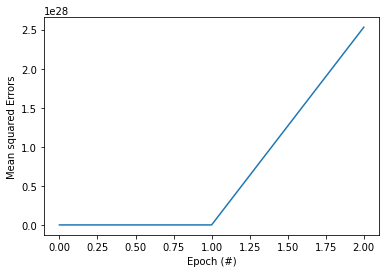

In [9]:
## Use gradient descent
myMSE = list()
lr = 0.001
for epoch in tqdm(range(1000)):
    a.grad.zero_()
    b.grad.zero_()
    c.grad.zero_()
    d.grad.zero_()
    e.grad.zero_()
    f.grad.zero_()
    g.grad.zero_()
    h.grad.zero_()
    i.grad.zero_()
    
    predicted = Model(households, housing_median_age, latitude, longitude, median_income, population, total_bedrooms, total_rooms)
    loss = MSE(y_predicted = predicted, y_target = median_house_value) # calculate MSE
    
    loss.backward() # compute gradients
    myMSE.append(loss.item()) # append loss
    with torch.no_grad():
        a -= a.grad * lr
        b -= b.grad * lr
        c -= c.grad * lr
        d -= d.grad * lr
        e -= e.grad * lr
        f -= f.grad * lr
        g -= g.grad * lr
        h -= h.grad * lr
        i -= i.grad * lr
        
plt.plot(myMSE);
plt.xlabel('Epoch (#)'), plt.ylabel('Mean squared Errors')

# Analisis dan Kesimpulan

Dari plot losses yang didapat, dilihat losses semakin tinggi untuk setiap iterasi. Hal ini dapat terjadi akibat
1. Model linear regresi tidak cocok untuk dataset yang disajikan.
2. MSE bukan fungsi losses yang baik untuk di backpropagation oleh model.
3. Layer kurang dan belum ada fungsi aktivasi yang baik.
4. Penggunaan gradient descent tidak cocok untuk kasus ini.